## EDA

emotions in tweets throughout: 
- the week
- the day

In [1]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [4]:
# Load in data already separated into train and test data
data = pd.read_csv('../data/data_cleaned.csv', encoding='latin-1', index_col = 0)

# replace sentiment with their real values
data['sentiment'] = data['sentiment'].replace({0: 'negative', 2: 'neutral', 4: 'positive'})

# sort by datetime
sorted_data = data.sort_values(by='date')

# print out head
sorted_data.head()

,sentiment,tweet_id,date,query,user,text
8576,negative,1548275819,Fri Apr 17 20:30:44 PDT 2009,NO_QUERY,MrzEndy,aww r cut thing world easy love n love u back ...
8578,negative,1548276175,Fri Apr 17 20:30:45 PDT 2009,NO_QUERY,thisgoeshere,boyfriend go town day believe feel lonely alre...
8579,negative,1548276329,Fri Apr 17 20:30:49 PDT 2009,NO_QUERY,sexyskier,sim see tonight eu vou mandar fotos amanha par...
8586,negative,1548276901,Fri Apr 17 20:30:55 PDT 2009,NO_QUERY,zoeydecay,bore watch law order want sunday come need goo...
8598,negative,1548279034,Fri Apr 17 20:31:12 PDT 2009,NO_QUERY,sanamhatesyou,sexi boi u fly wish give u try manz home waiti...


### What day do people tweet the most

In [5]:
day_of_week = sorted_data.copy()

day_of_week  = day_of_week[['sentiment', 'date']]

day_of_week['date'] = pd.to_datetime(day_of_week['date'])

day_of_week['day'] = day_of_week['date'].dt.day_name()
day_of_week['time'] = day_of_week['date'].dt.time

# day_of_week = day_of_week.drop('date', axis = 1)

day_of_week.head()

/Users/nechamaborisute/anaconda3/envs/learn-env/lib/python3.8/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,sentiment,date,day,time
8576,negative,2009-04-17 20:30:44,Friday,20:30:44
8578,negative,2009-04-17 20:30:45,Friday,20:30:45
8579,negative,2009-04-17 20:30:49,Friday,20:30:49
8586,negative,2009-04-17 20:30:55,Friday,20:30:55
8598,negative,2009-04-17 20:31:12,Friday,20:31:12


<AxesSubplot:xlabel='sentiment', ylabel='count'>

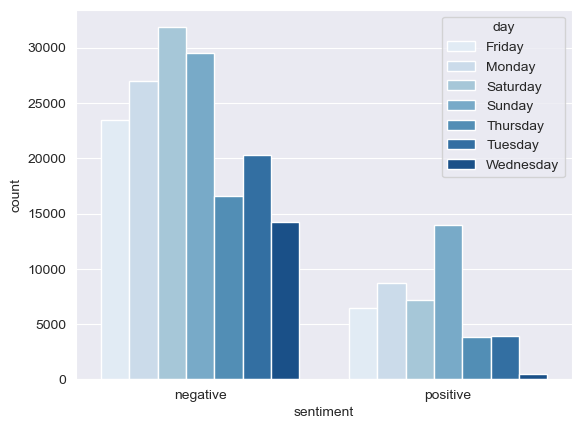

In [12]:
sns.set_style("darkgrid")
sns.countplot(data = day_of_week, x = 'sentiment', hue = 'day', palette='Blues')

* Tweets are more negative in general.
* Negative tweets hit the roof on Saturday.
* Positive tweets are at the highest on Sundays
* On Wednesday people are DONE with positivity

### What time of day do people tweet 

In [14]:
day_of_week.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207344 entries, 8576 to 1033262
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   sentiment  207344 non-null  object        
 1   date       207344 non-null  datetime64[ns]
 2   day        207344 non-null  object        
 3   time       207344 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 7.9+ MB


In [15]:
# create hour column
day_of_week['hour'] = day_of_week['date'].dt.hour

# group by day, hour, sentiment
days = day_of_week.groupby(['day', 'hour', 'sentiment']).size().unstack()

In [18]:
def plot_day_sentiment(day_name, data=days):
    
    day = data.loc[f'{day_name}']

    day['total_count'] = day['positive'] + day['negative']

    fig, ax = plt.subplots()

    sns.scatterplot(data = day, x=day.index, y=day['total_count'], hue= day['negative'], size= day['positive'], palette='Blues', ax = ax)
#     sns.scatterplot(data = sunday, x=sunday.index, y=sunday['total_count'], size= sunday['positive'], ax = ax)

    # Set labels and title
    plt.xlabel('Hour of the day')
    plt.ylabel('Sentiment count')
    plt.title(f'Sentiment Count by Hour: {day_name}')

    plt.legend(loc=1)
    # Display the plot
    plt.show()

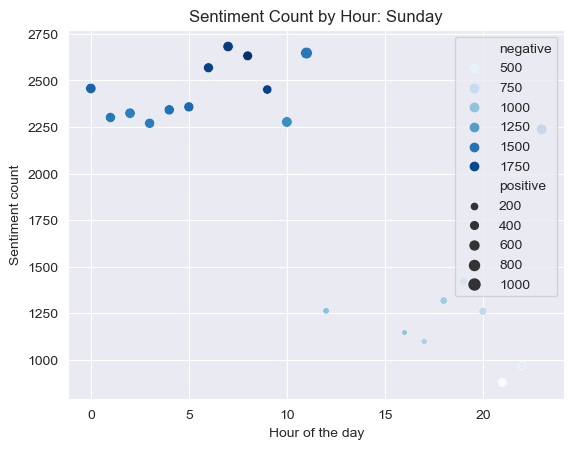

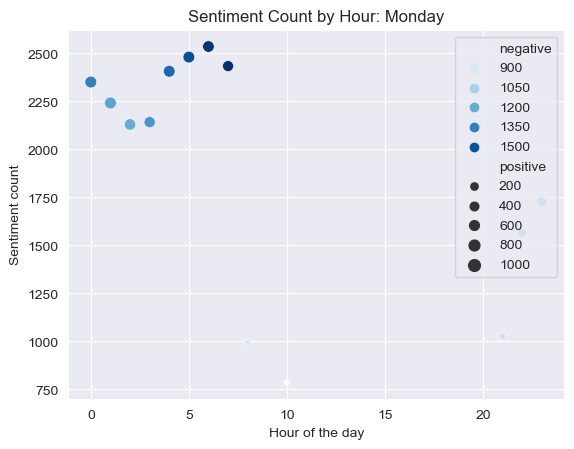

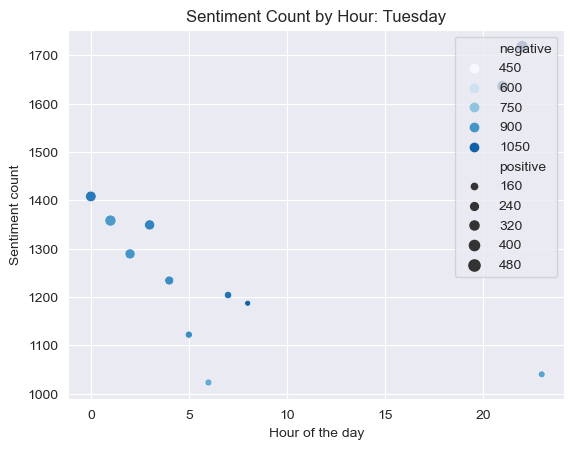

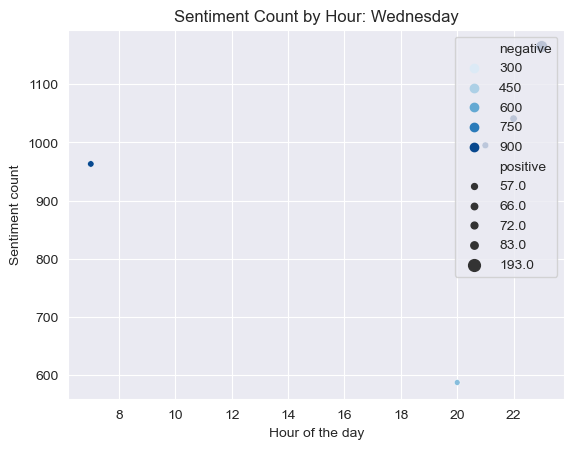

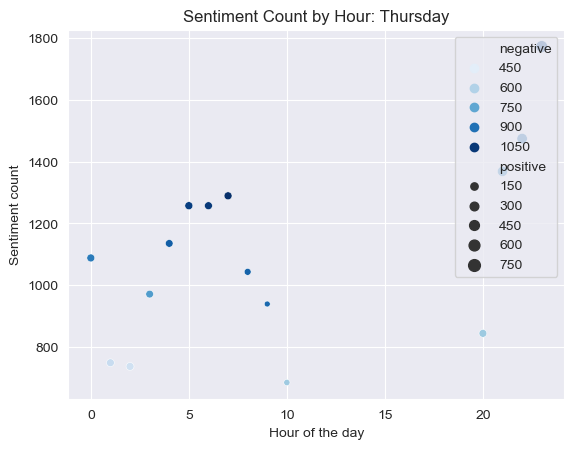

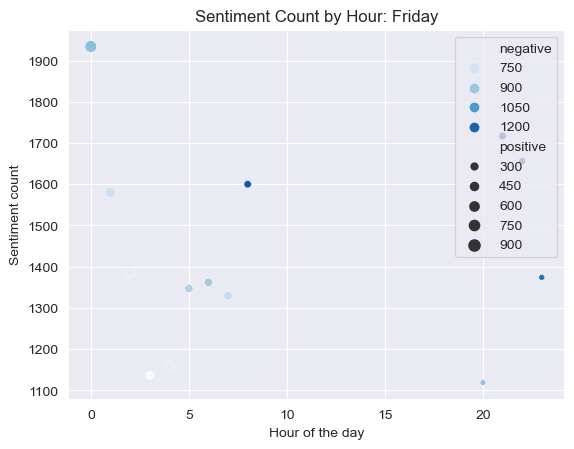

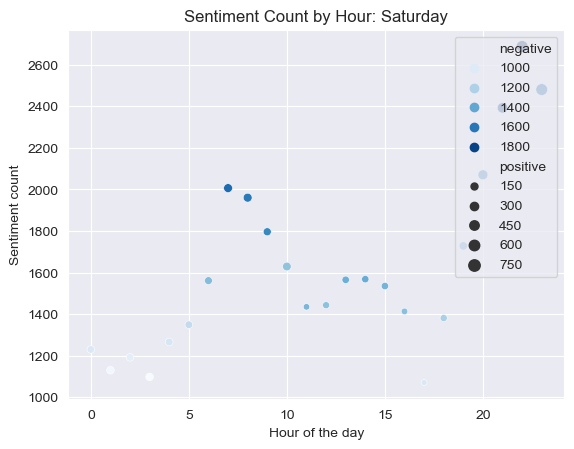

In [19]:
week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for day in week:
    plot_day_sentiment(day)

In [22]:
def plot_day_sentiment_bar(day_of_week, day_name, data=days):
    day = data.loc[f'{day_name}']
    day['total_count'] = day['positive'] + day['negative']

    # Create a stacked bar plot
    fig, ax = plt.subplots()
    ax.bar(day.index, day['positive'], label='Positive', color='green')
    ax.bar(day.index, day['negative'], bottom=day['positive'], label='Negative', color='red')

    # Set labels and title
    plt.xlabel('Hour of the day')
    plt.ylabel('Sentiment count')
    plt.title(f'Sentiment Count by Hour: {day_name}')
    
    plt.legend()
    # Display the plot
    plt.show()

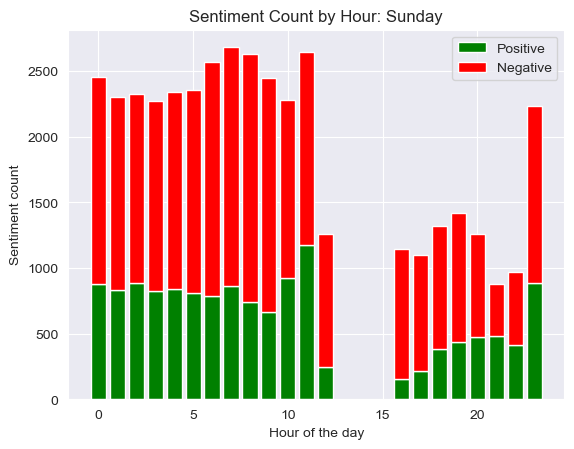

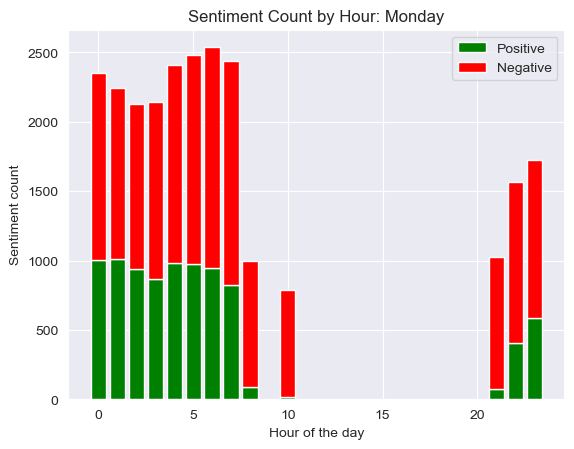

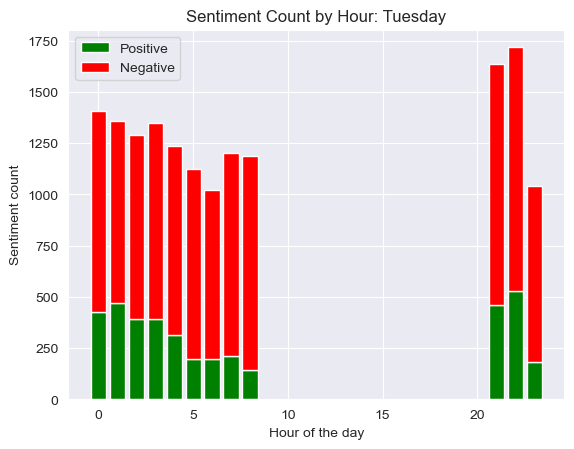

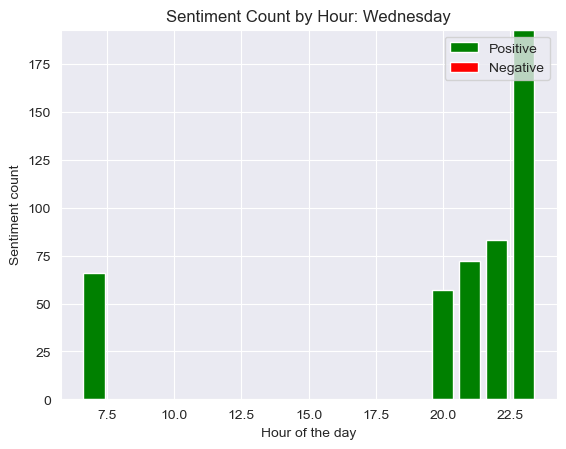

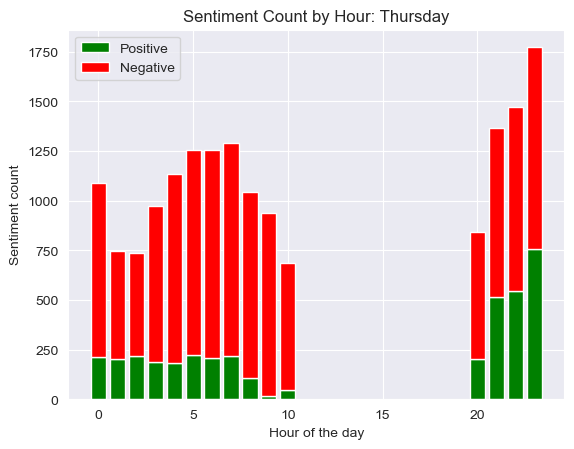

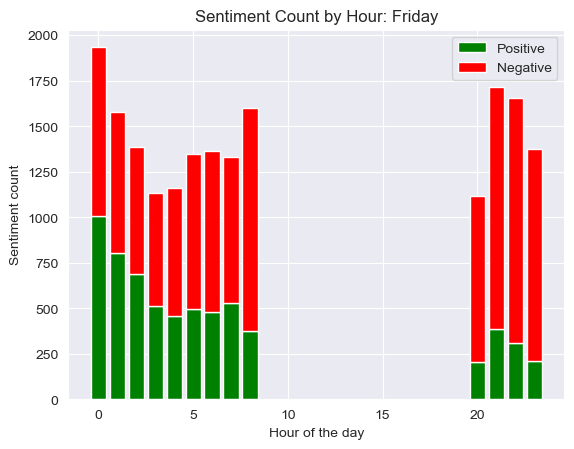

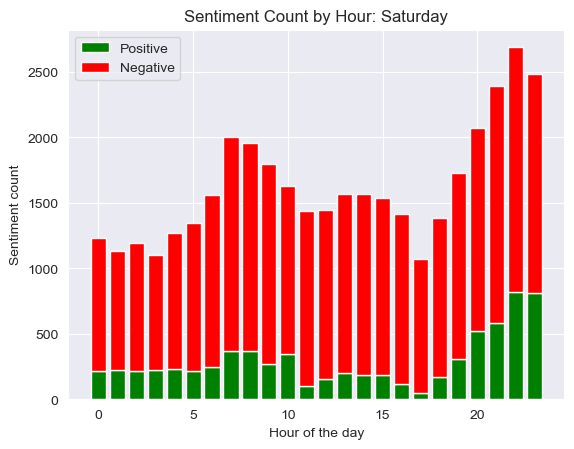

In [23]:
for day in week:
    plot_day_sentiment_bar(day_of_week, day)

In [ ]:
topic_name_dict = {0: 'the_feelings', 1: 'mothers_day', 2: 'activities', 3: 'traveling', 4: 'good_wishes'}

tsne = TSNE(random_state=42, learning_rate=100)
tsne_trans = tsne.fit_transform(X_vectorized)
tsne_trans = pd.DataFrame(tsne_trans, columns = ['TSNE1', 'TSNE2'])

# for each document takes the topic with highest weight and assigns document to this class -- hard clustering.
tsne_trans['class'] = np.argmax(X_vectorized, axis = 1)
tsne_trans['class'] = tsne_trans['class'].replace(topic_name_dict)

plt.figure(figsize=(10,10))
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'class', data = tsne_trans, palette = 'tab10')
plt.title('Visualization of top tweet words')
plt.show()